# Pymaceuticals Inc.
---

### Analysis

In this study, 249 mice with SCC tumors received treatment with a range of drug regimen and their tumor devlopment was measured for 45 days to study the potency of different drugs. Conclusions drawn from the analysis suggests:

In an ideal scenario, the values for duplicate mice by ID number and Timepoint(mouse ID-g989), should have been kept after removing the duplicates, however since the data varied for each timepoint (except for 0 days), that mouse ID was dropped to clean the data

Out of 10 drug regimen, 4 drugs were analysed in details, of which the values of final tumor volume for Capomulin and Ramicane were less as compared to the Infubinol and Ceftamin. However, the analysis was performed on the final tumor volume, in order to check the effectiveness of the drug in reducing the tumor volume, a comparison of all the data points (or atleast the 0 timepoint and 45-days Timepoint) should have been more appropriate.

The weight of the mice and the average tumor size showed a postitive correlation (0.84).

The mean and median values for Capomulin and Ramicane is very less as compared to the other drugs, it could be possible that the drugs reduced the tumor over-time (constantly), therefore both mean and median values are very close and less, it might be possible that the tumor size for both the regimens were small from the beginning. A deeper analysis would provide a fuller picture about the effectiveness of these drugs


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "outer")

# Display the data table for preview

combined_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [4]:
grouped_data = combined_df.groupby(["Mouse ID"])
grouped_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint, counts variable holds the no. of rows each mouse ID has
counts = grouped_data.size()

In [6]:
#Since there are 10 timepoints, anything above 10 will duplicate 
counts.max()

13

In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_dup = []

for x, y in counts.items():
    if y>10:
        print(f"ID : {x}, Value : {y}")
        find_dup.append([x,y])
        
find_dup

ID : g989, Value : 13


[['g989', 13]]

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_clean_df = clean_df .groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_TV = summ_clean_df["Tumor Volume (mm3)"].mean()
median_TV = summ_clean_df["Tumor Volume (mm3)"].median()
Variance_TV = summ_clean_df["Tumor Volume (mm3)"].var()
STD_TV = summ_clean_df["Tumor Volume (mm3)"].std()
SEM_TV = summ_clean_df["Tumor Volume (mm3)"].sem()


Summ_Stats = ({"Mean Tumor Volume": mean_TV,
                              "Median Tumor Volume": median_TV,
                              "Tumor Volume Variance": Variance_TV,
                                "Tumor Volume Std. Dev.": STD_TV,
                              "Tumor Volume Std. Err.": SEM_TV})

Summ_Stats_df= pd.DataFrame(Summ_Stats)
Summ_Stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
new_df = clean_df[["Drug Regimen","Tumor Volume (mm3)"]].copy()
new_df_gropued = new_df.groupby("Drug Regimen")

# Using the aggregation method, produce the same summary statistics in a single line
new_df_gropued.aggregate(["mean", "median","var","std", "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

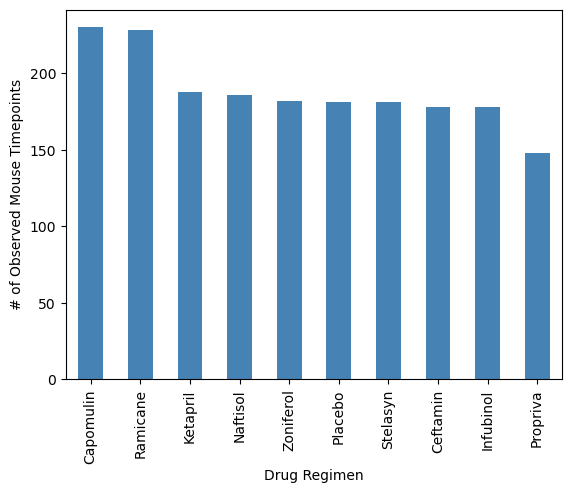

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

tot_Num_rows = summ_clean_df["Drug Regimen"].count()
#x_axis = np.arange(len(summ_clean_df["Drug Regimen"]))
tot_Num_rows = tot_Num_rows.sort_values(ascending=False)


# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Fig_1 = tot_Num_rows.plot(kind="bar", facecolor= "steelblue", 
                       xlabel= "Drug Regimen",
                         ylabel = "# of Observed Mouse Timepoints")

xticklabels = tot_Num_rows.index
Fig_1.set_xticklabels(xticklabels, rotation = 90)

plt.show()

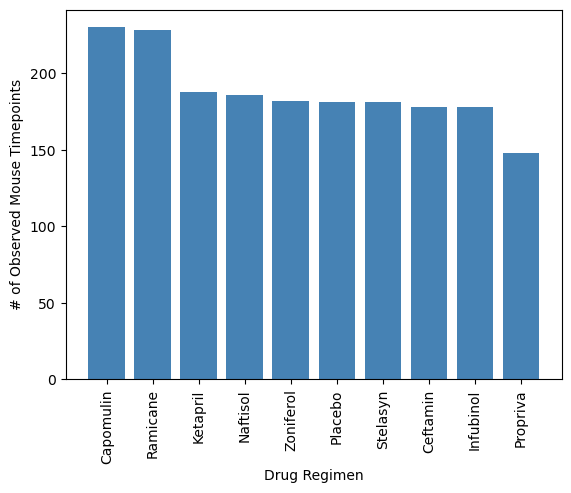

In [20]:
# Set x axis and tick locations
x_axis = np.arange(0, len(tot_Num_rows))
tick_locations = [drug for drug in x_axis]
tick_locations


# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis,tot_Num_rows, color="steelblue", align="center")
plt.xticks(tick_locations, tot_Num_rows.index , rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



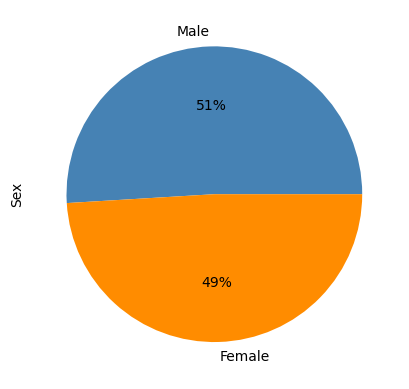

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Counts_Gender = clean_df["Sex"].value_counts()
colors = ["steelblue", "darkorange"]


Fig_2 = Counts_Gender.plot(kind='pie', y='Sex', autopct='%1.0f%%', colors=colors)
plt.show()

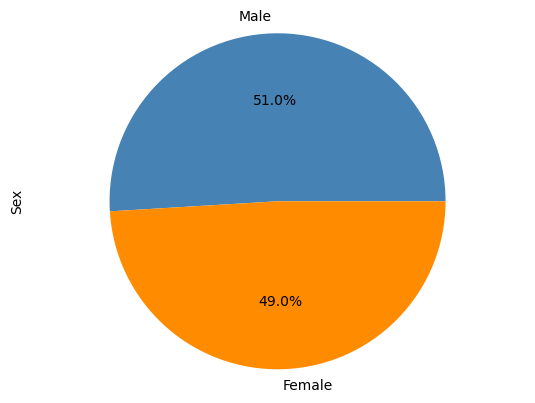

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Counts_Gender, labels=Counts_Gender.index, colors=colors,
        autopct="%1.1f%%", startangle=0)
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_df_2 = clean_df.set_index("Drug Regimen")
Selected_df= clean_df_2.loc[['Capomulin',"Ramicane","Infubinol", "Ceftamin"]].reset_index()
Selected_df

# Start by getting the last (greatest) timepoint for each mouse
Max_TP_df = pd.DataFrame(Selected_df.groupby("Mouse ID")['Timepoint'].nlargest(1))
#.rename(columns= {"Timepoint": "Max. Timepoint"})
Max_TP_df

,,Timepoint
Mouse ID,,
a203,572,45
a251,534,45
a275,766,45
a411,264,45
a444,274,45
...,...,...
y769,706,45
y793,151,45
y865,696,45


In [24]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merged_df=Max_TP_df.merge(clean_df, on=["Mouse ID", "Timepoint"])
Merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
selected_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
low_q = []
upper_q = []
IQR = []
Lower_bound = []
Upper_bound = []
outliers = []

# Create empty list to fill with tumor vol data (for plotting)
for drug in selected_drug:
    TV_data = Merged_df.loc[Merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    quartiles = TV_data.quantile([.25,.5,.75])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    lowerq = quartiles[0.25]
    low_q.append(lowerq)
    upperq = quartiles[0.75]
    upper_q.append(upperq)
    iqr = upperq-lowerq
    IQR.append(iqr)
    low_bound = lowerq - (1.5*iqr)
    Lower_bound.append(low_bound)
    upp_bound = upperq + (1.5*iqr)
    Upper_bound.append(upp_bound)
      
    # Determine outliers using upper and lower bounds
    outlier = TV_data.loc[(TV_data<low_bound)|(TV_data>upp_bound)]
    print(f"Outlier has been found for the drug: {drug} and its value is {outlier}")
    
    
Stats = pd.DataFrame({"Drug_regimen" : selected_drug,
                     "Lower Quartile" : low_q,
                     "Upper Quartile" : upper_q,
                     "IQR": IQR,
                     "Lower Bound": Lower_bound,
                     "Upper Bound": Upper_bound})

Stats.head() 

Outlier has been found for the drug: Capomulin and its value is Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier has been found for the drug: Ramicane and its value is Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier has been found for the drug: Infubinol and its value is 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outlier has been found for the drug: Ceftamin and its value is Series([], Name: Tumor Volume (mm3), dtype: float64)


,Drug_regimen,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


Text(0, 0.5, 'Final Tumor Volume (mm3)')

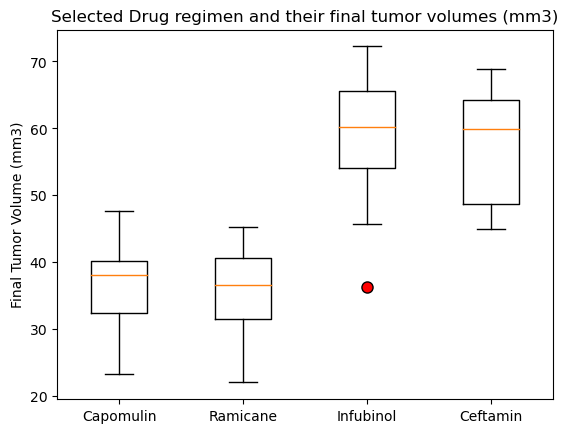

In [66]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group using PyPlot
Capomulin = Merged_df.loc[Merged_df["Drug Regimen"]=="Capomulin", "Tumor Volume (mm3)"].values
Ramicane = Merged_df.loc[Merged_df["Drug Regimen"]=="Ramicane", "Tumor Volume (mm3)"].values
Infubinol = Merged_df.loc[Merged_df["Drug Regimen"]=="Infubinol", "Tumor Volume (mm3)"].values                         
Ceftamin = Merged_df.loc[Merged_df["Drug Regimen"]=="Ceftamin", "Tumor Volume (mm3)"].values 

red_point = dict(markerfacecolor = "red", markersize=8)
plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin], labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],flierprops= red_point);
plt.title("Selected Drug regimen and their final tumor volumes (mm3)")
plt.ylabel("Final Tumor Volume (mm3)")

Text(0.5, 0, '  ')

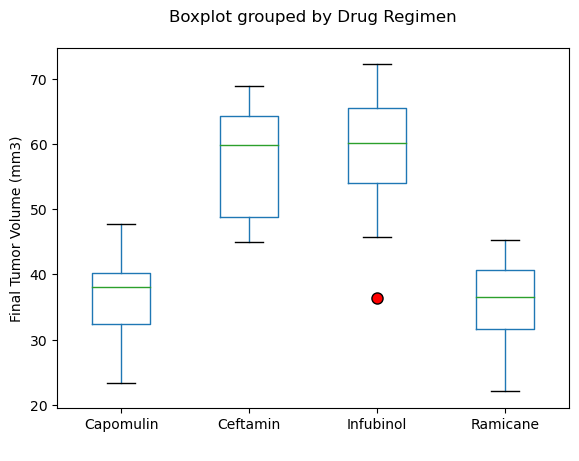

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group using Pandas
Box_plot_pd = Merged_df.boxplot(column = "Tumor Volume (mm3)", by = "Drug Regimen", grid=False, flierprops= red_point);
plt.title("   ")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("  ")

## Line and Scatter Plots

In [56]:
#subset dataframe for mouse treated with capomulin
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_data
#selecting data for a single mouse treated with Capomulin
mouse_m601 = capomulin_data.loc[capomulin_data["Mouse ID"] == "m601",:]
mouse_m601

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


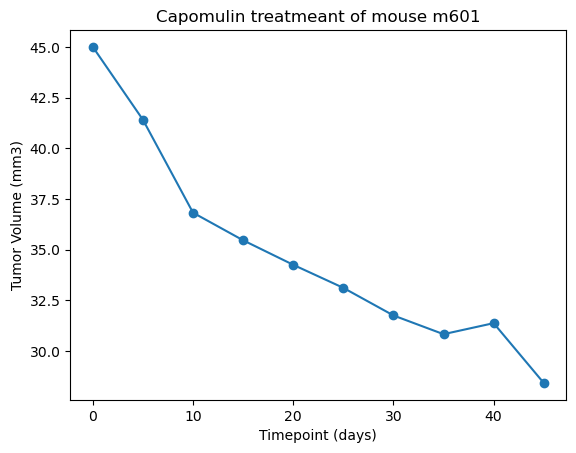

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
X_axis= mouse_m601["Timepoint"]
Y_axis= mouse_m601["Tumor Volume (mm3)"]
plt.plot(X_axis, Y_axis, label = "mouse_m601", marker = "o")
plt.title('Capomulin treatmeant of mouse m601')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

C:\Users\nikit\AppData\Local\Temp\ipykernel_14468\1653857186.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Avg_Cap_data = capomulin_data.groupby(["Mouse ID"]).mean()


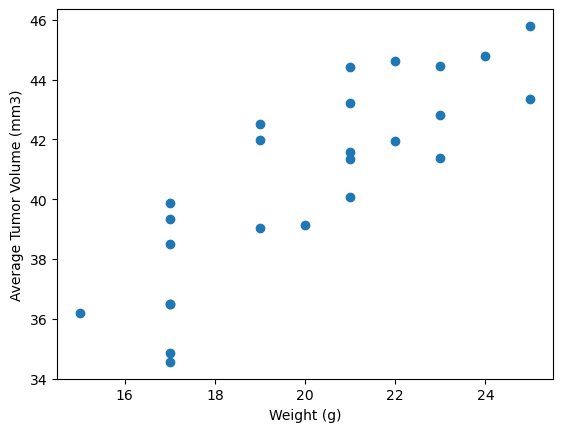

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Avg_Cap_data = capomulin_data.groupby(["Mouse ID"]).mean()
plt.scatter(Avg_Cap_data["Weight (g)"],Avg_Cap_data["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


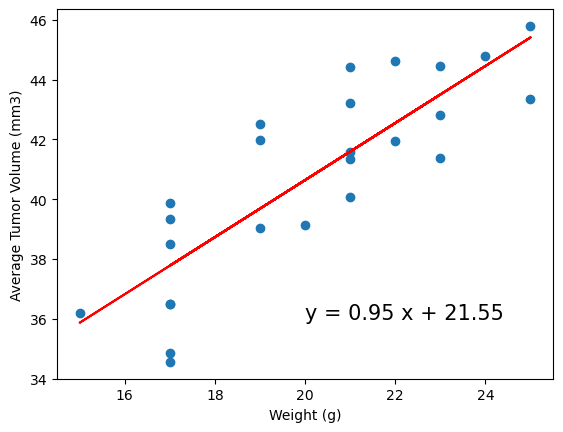

In [76]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff = st.pearsonr(Avg_Cap_data['Weight (g)'],Avg_Cap_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coeff[0], 2)}")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(Avg_Cap_data["Weight (g)"],Avg_Cap_data["Tumor Volume (mm3)"])
regress_values=Avg_Cap_data["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(Avg_Cap_data["Weight (g)"],Avg_Cap_data["Tumor Volume (mm3)"])
plt.plot(Avg_Cap_data["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()